[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_07-TheMachineLearningFramework/blob/master/M07_A--DJ--The_Machine_Learning_Framework.ipynb)

# The Machine Learning Framework:

By the end of this assignment, I hope you begin to feel like a real data scientist. 

For your assignment I have obtained a dataset of 3333 records of cell phone user data. Your mission -should you choose to accept it- is to train a model that can predict whether or not a user "churns" -cancels their plan at the end of the month. 

The purpose of this assignment is for you to familiarize yourself with what we call **The Machine Learning Framework**:

![The Machine Learning Framework](http://www.ryanleeallred.com/wp-content/uploads/2018/05/machine-learning-framework-1.png)

This will be one of your first opportunities to go from A-Z on a project. What's exciting about this assignment is that you are free to do whatever you think will get you the best performing classifier using the Machine Learning Framework as a guide. 

What is also exciting about this assignment is that we will be using a private Kaggle competition to score your models!

## The Process: 

**You shouldn't just go through the cycle pictured above just once.**

Start off by doing what seems like the *bare minimum* in order to train your classifier and make predictions that are slightly better than random. As you explore the data, make a note of ways that you can improve your model. Then, after you have made your first-pass predictions, prioritize your list of improvements based on their difficulty and estimated value. Each time you make an improvement, re-train and re-validate your model to see if your changes have truly made your classifier better. 

As you go through this cycle of improving your data/model and validating your improvements, your predictions will get better and better until you simply run out of time to make more improvements.  


## Business Understanding

Gaining domain knowledge and a business understanding about a problem is extremely useful. It wil help you communicate your findings to stakeholders and give you insights about the data exploration process.

[What is churn analysis?](https://www.datascience.com/blog/what-is-a-churn-analysis-and-why-is-it-valuable-for-business)

[The importance of predicting customer churn ](https://www.optimove.com/learning-center/customer-churn-prediction-and-prevention)

## The Data:

You will have access to a randomly selected 66.66% of the data for your training dataset. This will have all of the columns **including** whether or not the customer churned. The other 33.33% will be in the test dataset **without** any information about the customer churn. You will run experiments on the training dataset, but ultimately will be required to make predictions and submissions to our private Kaggle Leaderboard using the test dataset.

## [Access the data and the Kaggle leaderboard here](https://www.kaggle.com/t/148ead80810e46ae8383517a543756dd)

**You are going to need to create an account on Kaggle if you don't already have one.**

### Once I:

1. Set up my Kaggle Account

2. downloaded and api key to my local computer ~/.kaggle/kaggle.json

3. Agreed to the terms of the competition

I was able to download the the files from the competition to my Anaconda environment with this command:


!kaggle competitions download -c lambda-school-churn-challenge

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

!ls *csv

fake-data.csv                  submission.csv
logistic_regression.csv        test.csv
pima-indians-diabetes.data.csv train.csv


## Data Understanding

Do whatever exploratory data analysis you need to do in order to be educated about what's in this dataset. You're going to need some graphs at the bare minimum.

In [4]:
### Download the data from the Kaggle competition through the API
#!kaggle competitions download -c lambda-school-churn-challenge
#!ls ~/.kaggle/competitions/lambda-school-churn-challenge/

In [5]:
#copy the downloaded datasets 

#!cp ~/.kaggle/competitions/lambda-school-churn-challenge/train.csv .
#!cp ~/.kaggle/competitions/lambda-school-churn-challenge/test.csv .


df_sample = pd.read_csv('submission.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print(df_sample.shape, df_train.shape, df_test.shape)

(1111, 2) (2222, 22) (1111, 22)


In [7]:
# test submission
#!cp ~/.kaggle/competitions/lambda-school-churn-challenge/sampleSubmission.csv submission.csv
#!kaggle competitions submit -c lambda-school-churn-challenge -f submission.csv -m "Test Submission"

In [8]:
df_sample.head()

,id,churn
0,221,1
1,1313,1
2,1635,1
3,289,1
4,2416,1


In [9]:
df_train.head()
df_train.churn.unique()

array([0, 1])

In [10]:
df_test.head()
df_test.churn.unique()

array([9999])

In [6]:
df_test[:0]


['id',
 'state',
 'account_length',
 'area_code',
 'phone',
 'international_plan',
 'vmail_plan',
 'vmail_message',
 'day_mins',
 'day_calls',
 'day_charge',
 'eve_mins',
 'eve_calls',
 'eve_charge',
 'night_mins',
 'night_calls',
 'night_charge',
 'intl_mins',
 'intl_calls',
 'intl_charge',
 'custserv_calls',
 'churn']

['id',
 'state',
 'account_length',
 'area_code',
 'phone',
 'international_plan',
 'vmail_plan',
 'vmail_message',
 'day_mins',
 'day_calls',
 'day_charge',
 'eve_mins',
 'eve_calls',
 'eve_charge',
 'night_mins',
 'night_calls',
 'night_charge',
 'intl_mins',
 'intl_calls',
 'intl_charge',
 'custserv_calls',
 'churn']

In [28]:
for column in df_trainNQ:
    print(df_trainNQ[column][:0][:][:])
    print(df_train[column].unique())
    print(df_trainNQ[column].unique())
    

Series([], Name: id, dtype: int64)
[3200 2129  598 ... 1414 1691 1867]
[3200 2129  598 ... 1414 1691 1867]
Series([], Name: state, dtype: object)
['CT' 'AZ' 'VT' 'PA' 'OK' 'MD' 'OH' 'AL' 'AR' 'GA' 'DE' 'NV' 'VA' 'NM'
 'WV' 'ID' 'NH' 'NY' 'DC' 'ME' 'MI' 'KS' 'AK' 'TX' 'IN' 'SD' 'MO' 'NC'
 'UT' 'IL' 'CA' 'TN' 'OR' 'KY' 'HI' 'WA' 'MS' 'SC' 'ND' 'MT' 'CO' 'WY'
 'WI' 'MN' 'RI' 'NE' 'NJ' 'FL' 'LA' 'MA' 'IA']
['CT' 'AZ' 'VT' 'PA' 'OK' 'MD' 'OH' 'AL' 'AR' 'GA' 'DE' 'NV' 'VA' 'NM'
 'WV' 'ID' 'NH' 'NY' 'DC' 'ME' 'MI' 'KS' 'AK' 'TX' 'IN' 'SD' 'MO' 'NC'
 'UT' 'IL' 'CA' 'TN' 'OR' 'KY' 'HI' 'WA' 'MS' 'SC' 'ND' 'MT' 'CO' 'WY'
 'WI' 'MN' 'RI' 'NE' 'NJ' 'FL' 'LA' 'MA' 'IA']
Series([], Name: account_length, dtype: int64)
[100 146  84  43 101 116  71  68  92  33  98  51  99  87 166 144 119 158
 180 193 128 121  78 126 153  77  50 209 164  89  61  86  79 160  21 104
 125 157  81  55  13  75 108  97 136 113 132  53 118 114  91 130  80 137
 147 150 141 131 148  94 155 177  29 109 111  93 115 112 124  35  66

In [31]:
df_trainNQ.isnull().sum()

id                      0
state                   0
account_length          0
area_code             124
phone                   0
international_plan    342
vmail_plan            248
vmail_message           0
day_mins                0
day_calls               0
day_charge             74
eve_mins               60
eve_calls             348
eve_charge              0
night_mins              0
night_calls             0
night_charge          200
intl_mins               0
intl_calls            455
intl_charge           229
custserv_calls          0
churn                   0
dtype: int64

In [41]:
# id is unique
len(df_trainNQ['id'].unique())


2222

In [46]:
df_trainNQ[df_trainNQ['vmail_message']==0 & (df_trainNQ['vmail_plan']=='no')].count()

id                    1627
state                 1627
account_length        1627
area_code             1531
phone                 1627
international_plan    1374
vmail_plan            1448
vmail_message         1627
day_mins              1627
day_calls             1627
day_charge            1578
eve_mins              1591
eve_calls             1361
eve_charge            1627
night_mins            1627
night_calls           1627
night_charge          1469
intl_mins             1627
intl_calls            1297
intl_charge           1461
custserv_calls        1627
churn                 1627
dtype: int64

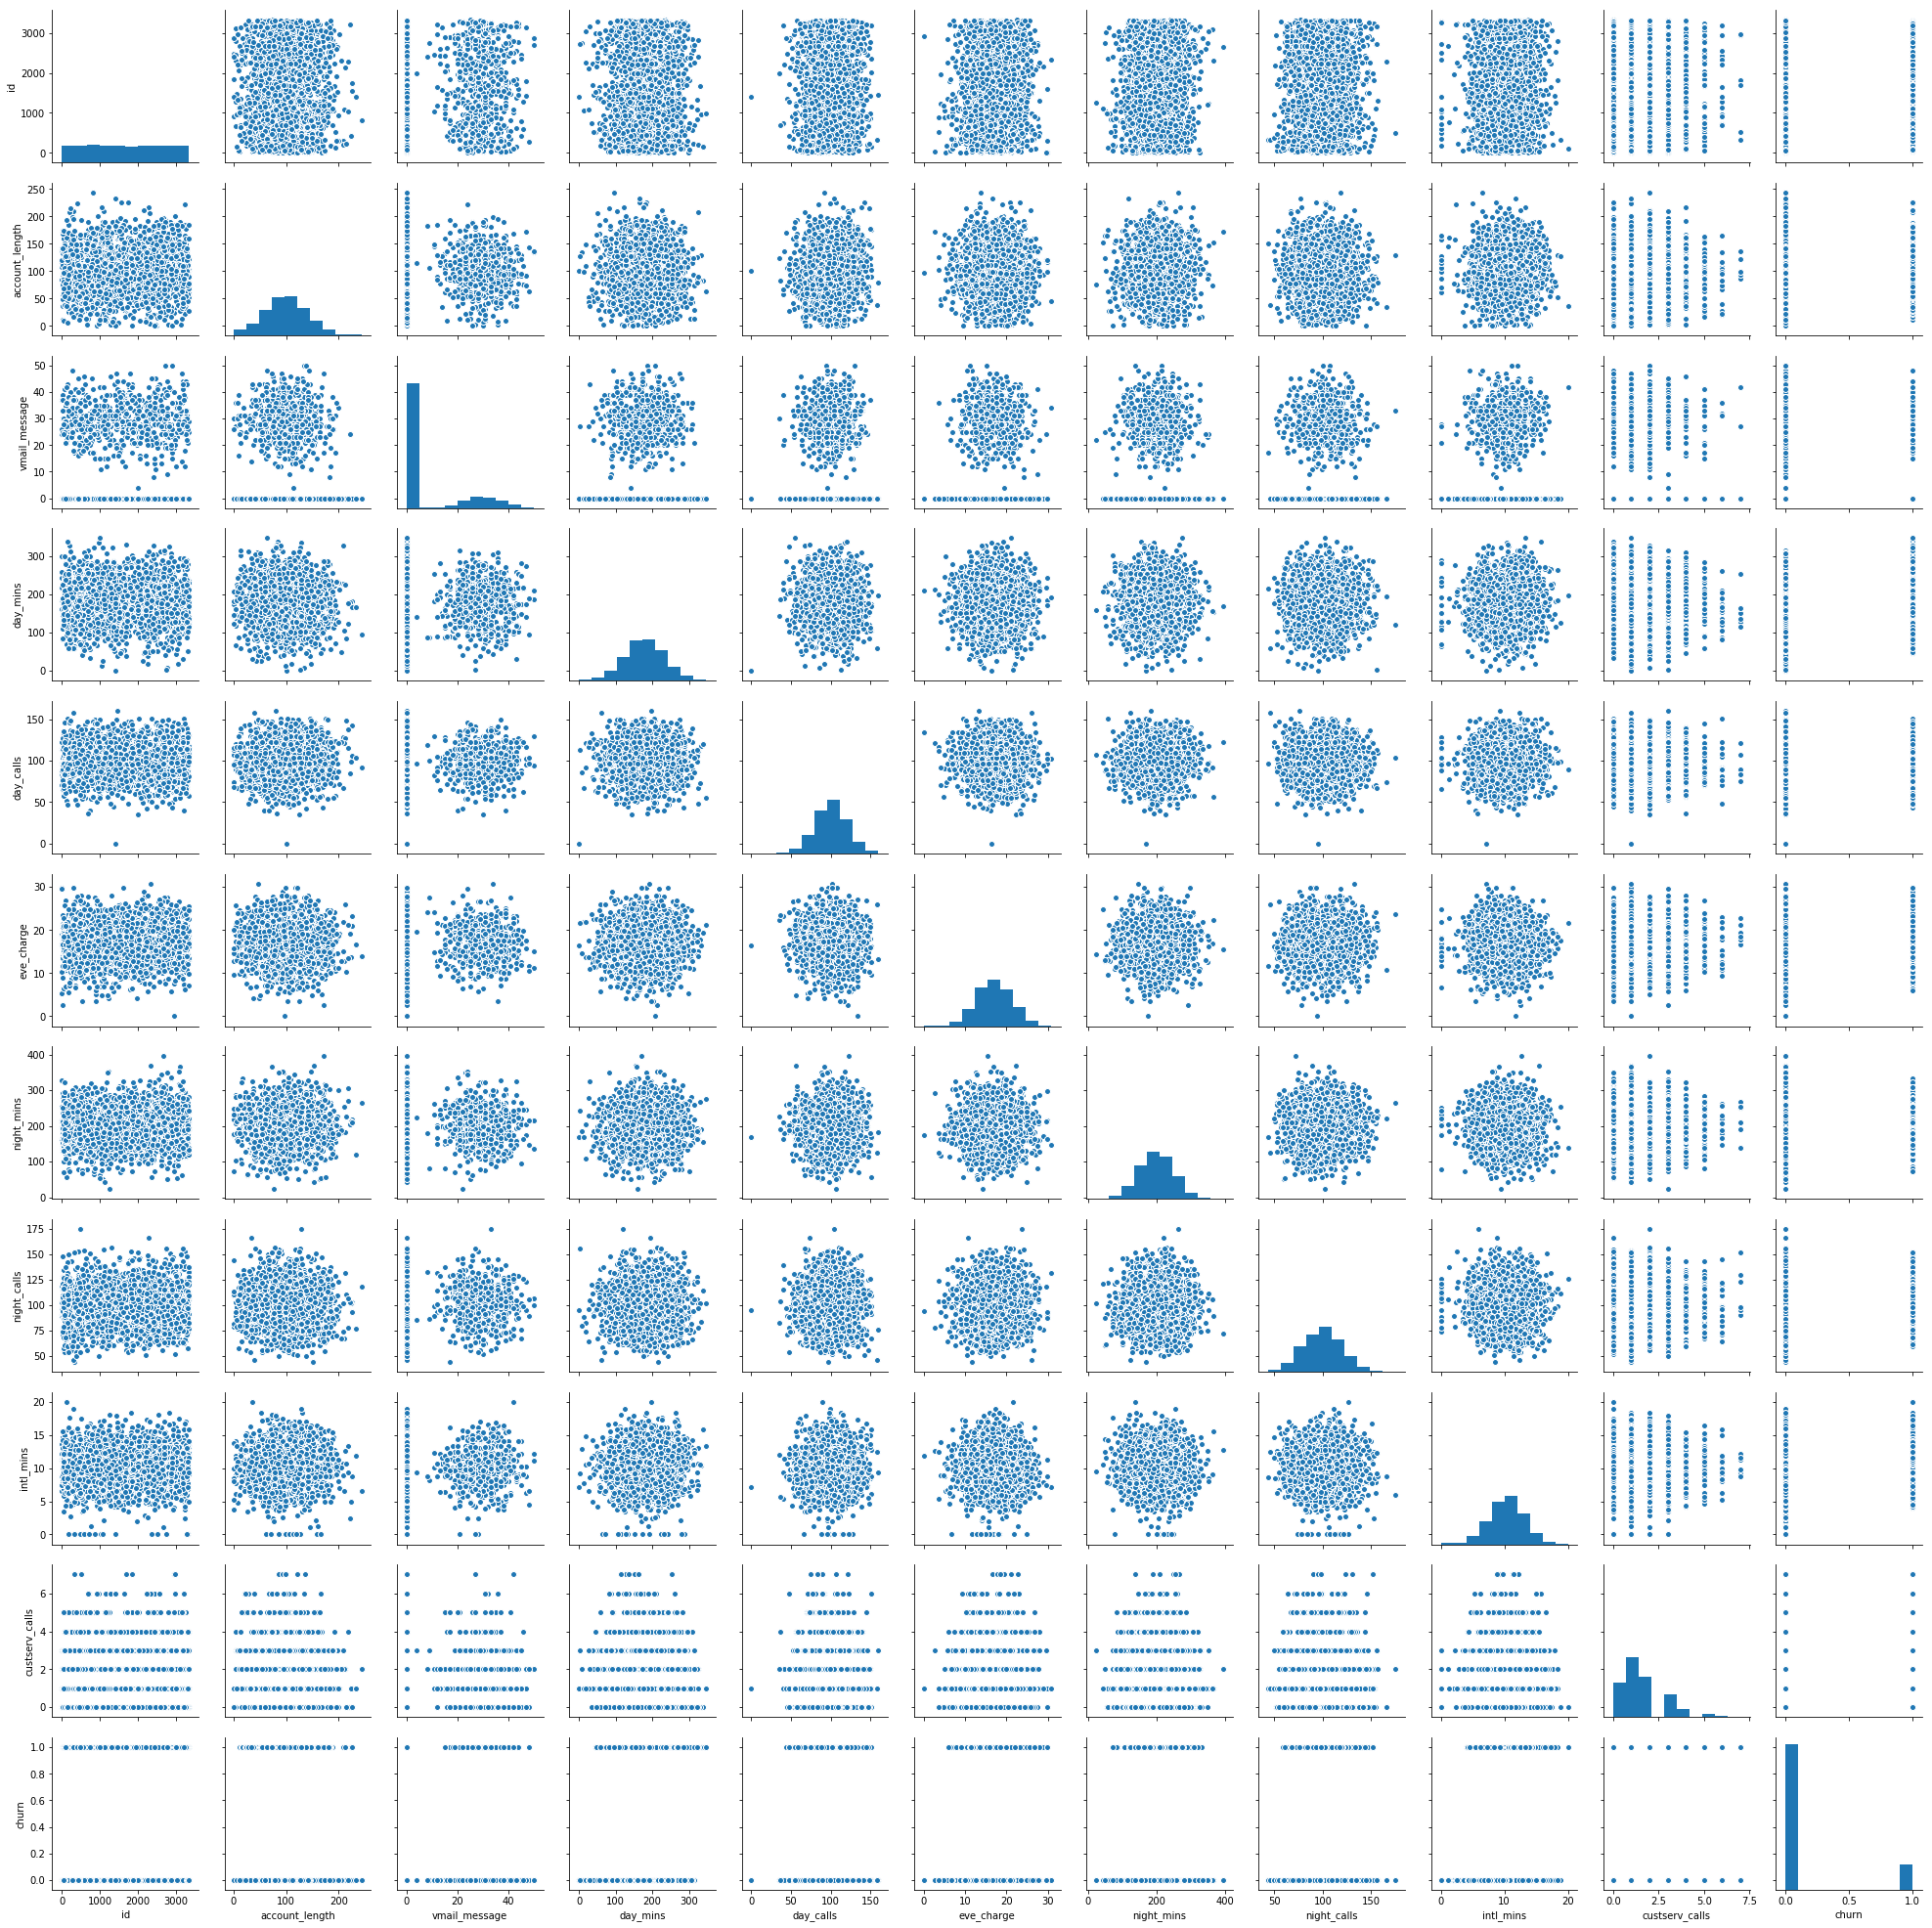

In [41]:
sns.pairplot(df_train)

In [42]:
sns.heatmap(df_train)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## Data Preparation

You will probably go back and forth between data preparation and data understanding. Some of the data you won't be able to explore until it is cleaned, and visa versa.

Real world data is messy, and this dataset is no exception. Start off by identifying the features that seem useful, and work on cleaning/preparing those columns first. Remember that you don't have to use every column of a dataset when you are fitting your model.

## Modeling

We've talked a lot about Logistic Regression so far, but there are a **lot** of classification models that you could use. In this section you will get a chance to do a little bit of research about 5 important classification algorithms. 

The purpose of this section is to give you a very very brief introduction to a few of the most popular supervised learning classification algorithms. It is **not** the purpose of this section/assignment that you understand all of the mathematical and programmatic inner-workings of these algorithms, but rather to give you a high level overview of their usage. Please defer your curiosity and perfectionism temporarily and focus on what you need to know in order to get an out-of-the box prediction from these classifiers using the sklearn library.

*   Support Vector Machine
*   Decision Tree Classifier
*   Random Forest Classifier
*   Naive Bayes Classifier
*   K-Nearest Neighbors Classifier


Once you have successfully fit each of these models to the test dataset and calculated their out-of-the-box ROC_AUC score, pick the top two highest performing classifiers and research their hyperparameters for future hyperparameter tuning.

List their hyperparameters here:

### Highest performing model's hyperparameters:

### Second highest performing model's hyperparameters:

___

Below is sample code for how to get an out-of-the-box estimate for a Logistic Regression model. You may reference it when finding the out-of-the-box predictions for the other 5 models.


In [ ]:
##### Logistic Regeression OUTB Estimate #####

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
cross_val = KFold(n_splits=3, random_state=42)
scores = cross_val_score(model, X, Y, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - Logistic Regression: ", scores.mean())

In [ ]:
##### Your Code Here #####

## Evaluation

Start off by making a submission to the Kaggle leaderboard that is purely a column of all 1s or 0s as a baseline. There is a sampleSubmission.csv file that is already prepared in this format if you would like to use that.

pick one of the better models from your out-of-the-box analysis and then use it to make predictions on the test dataset. Then take those predictions and make a new submission to the leaderboad. You are allowed 20 submissions to the leaderboard per day, so don't go submitting willy nilly.

Try and ensure that you have truly improved your classifier before making a new submission. Use the cross-validation techniques that we have been studying to evaluate your model on the training dataset before going to the trouble of making predictions on the test dataset and having to format a new submission.

In [ ]:
##### Your Code Here #####

## Repeat

The Machine Learning Framework is a cycle. Keep on looping through it and improving your classifier. Don't delete your previous work since we want to see how your thinking developed. Go back and try some hyperparameter tuning, format additional columns/features so that they are ready to be fed to the model. Keep on working down below, don't be afraid to add lots of code cells to your Colab.

## Stretch Goal:

Try and get the highest score that you possibly can. If you're not on the top of the leaderboard, then there must still be ways to improve your classifier that you haven't considered yet.

In [ ]:
##### Your Code Here #####